In [8]:
%pip install pandas
%pip install pydmd
%pip install scikit-learn
%pip install matplotlib
%pip install seaborn
%pip install keras_tuner
%pip install keras
%pip install numpy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [9]:
import sys

base_path = '/Users/yuri/git/diasYuri/tcc/radiation-forecast-mg'
sys.path.insert(0, base_path)

In [10]:

import keras
import numpy as np
import pandas as pd
from keras.callbacks import EarlyStopping
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense, LSTM
from keras.callbacks import EarlyStopping



from src.filler import interpolate_filler, fill_df
from src.dataframe import windowing, split_data, show_error_metrics
from src.scaler import Scaler


In [11]:
df_temp = pd.read_csv(
    f'{base_path}/data/daily_juiz de fora.csv',
    sep=',',
    parse_dates=['Timestamp'],
    index_col=['Timestamp'])

init_index = lambda _df: _df[_df.RADIATION != 0].index[0]

df = df_temp[['RADIATION', 'TEMP', 'HUMIDITY_h']] \
    .resample('D') \
    .agg({'RADIATION': np.sum})

df = df.loc[df.index >= init_index(df)].replace(0, np.nan)
print(df.isna().sum())
df

RADIATION    34
dtype: int64


/var/folders/tf/7zgm_5115vjc9x3162_qjg140000gn/T/ipykernel_87381/1895360295.py:9: FutureWarning: The provided callable <function sum at 0x1112c34c0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df = df_temp[['RADIATION', 'TEMP', 'HUMIDITY_h']] \


,RADIATION
Timestamp,
2007-05-26,9057.5
2007-05-27,10971.6
2007-05-28,13934.5
2007-05-29,10020.8
2007-05-30,7567.6
...,...
2022-12-27,16725.1
2022-12-28,15623.1
2022-12-29,10577.0


In [12]:
df = fill_df(df, interpolate_filler)
print(df.isna().sum())

RADIATION    0
dtype: int64


In [13]:
scaler = Scaler(df)
df_scaled = scaler.get_dataframe_scaled()
df_scaled

,RADIATION
2007-05-26,0.269568
2007-05-27,0.329010
2007-05-28,0.421021
2007-05-29,0.299483
2007-05-30,0.223300
...,...
2022-12-27,0.507681
2022-12-28,0.473459
2022-12-29,0.316755
2022-12-30,0.188572


In [14]:
X, Y = windowing(df_scaled, 'RADIATION', 3, 1)

In [15]:
for i in range(len(X)):
    print(X[i], Y[i])

[[0.26956819]
 [0.32900952]
 [0.42102076]] [0.29948294]
[[0.32900952]
 [0.42102076]
 [0.29948294]] [0.22330016]
[[0.42102076]
 [0.29948294]
 [0.22330016]] [0.22286229]
[[0.29948294]
 [0.22330016]
 [0.22286229]] [0.36858531]
[[0.22330016]
 [0.22286229]
 [0.36858531]] [0.30149217]
[[0.22286229]
 [0.36858531]
 [0.30149217]] [0.33582287]
[[0.36858531]
 [0.30149217]
 [0.33582287]] [0.54538143]
[[0.30149217]
 [0.33582287]
 [0.54538143]] [0.51460646]
[[0.33582287]
 [0.54538143]
 [0.51460646]] [0.41388755]
[[0.54538143]
 [0.51460646]
 [0.41388755]] [0.43227489]
[[0.51460646]
 [0.41388755]
 [0.43227489]] [0.48797416]
[[0.41388755]
 [0.43227489]
 [0.48797416]] [0.47227614]
[[0.43227489]
 [0.48797416]
 [0.47227614]] [0.51823673]
[[0.48797416]
 [0.47227614]
 [0.51823673]] [0.5240377]
[[0.47227614]
 [0.51823673]
 [0.5240377 ]] [0.52053476]
[[0.51823673]
 [0.5240377 ]
 [0.52053476]] [0.53009642]
[[0.5240377 ]
 [0.52053476]
 [0.53009642]] [0.51902862]
[[0.52053476]
 [0.53009642]
 [0.51902862]] [0.464

In [16]:
train_x, train_y, test_x, test_y = split_data(X, Y, length=len(df_scaled), ratio=0.9)

In [17]:
print(train_x.shape[1], train_x.shape[2])

3 1


Epoch 1/5000
70/70 [==============================] - 2s 11ms/step - loss: 0.1672 - val_loss: 0.1448
Epoch 2/5000
70/70 [==============================] - 0s 7ms/step - loss: 0.1368 - val_loss: 0.1384
Epoch 3/5000
70/70 [==============================] - 1s 7ms/step - loss: 0.1326 - val_loss: 0.1346
Epoch 4/5000
70/70 [==============================] - 0s 7ms/step - loss: 0.1284 - val_loss: 0.1374
Epoch 5/5000
70/70 [==============================] - 0s 7ms/step - loss: 0.1270 - val_loss: 0.1267
Epoch 6/5000
70/70 [==============================] - 0s 7ms/step - loss: 0.1237 - val_loss: 0.1244
Epoch 7/5000
70/70 [==============================] - 1s 7ms/step - loss: 0.1227 - val_loss: 0.1254
Epoch 8/5000
70/70 [==============================] - 0s 7ms/step - loss: 0.1225 - val_loss: 0.1269
Epoch 9/5000
70/70 [==============================] - 0s 7ms/step - loss: 0.1229 - val_loss: 0.1242
Epoch 10/5000
70/70 [==============================] - 0s 7ms/step - loss: 0.1224 - val_loss: 0.125

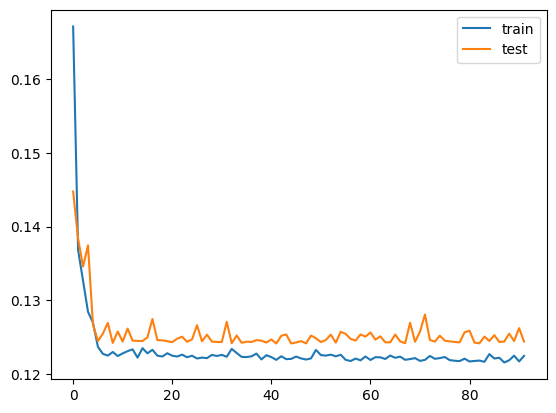

In [24]:
model = Sequential([
    LSTM(units=320, input_shape=(train_x.shape[1], train_x.shape[2])),
    Dense(1, activation='relu')
])

model.compile(loss='mae', optimizer=keras.optimizers.legacy.Adam())

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
history = model.fit(train_x,
                     train_y,
                     epochs=5000,
                     batch_size=64,
                     validation_split=0.13,
                     verbose=1,
                     callbacks=[es])
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [25]:
model.evaluate(test_x, test_y, verbose=1)

18/18 [==============================] - 0s 2ms/step - loss: 0.1210


0.12098249047994614

In [26]:
predict = model.predict(test_x)
show_error_metrics(test_y.reshape(-1,1), predict)

18/18 [==============================] - 0s 2ms/step
Test R2: 0.251
Test MSE: 0.024
Test RMSE: 0.156
Test MAE: 0.121
Test MAPE: 0.364


Test R2: 0.251
Test MSE: 0.024
Test RMSE: 0.156
Test MAE: 0.121
Test MAPE: 0.364


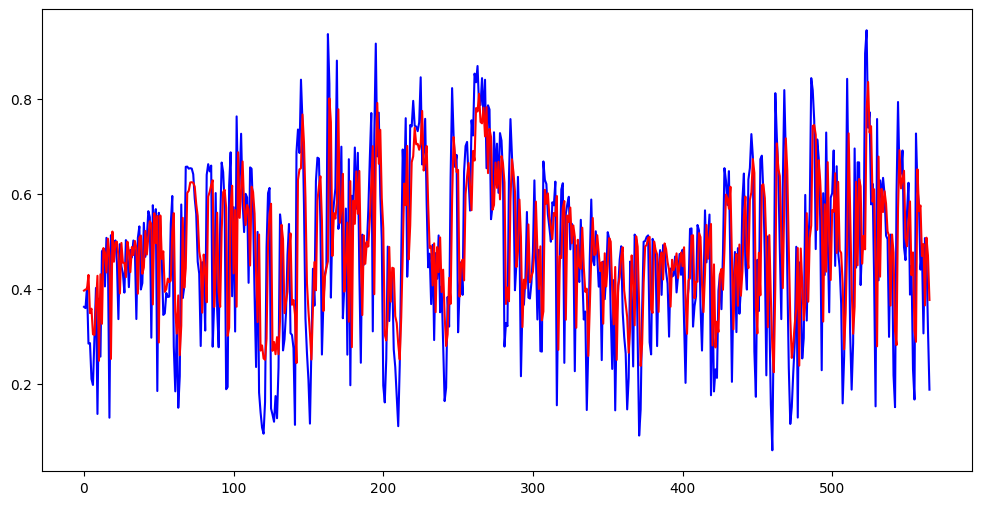

In [30]:
range_plot = 1000

pyplot.figure(figsize=(12, 6))
pyplot.plot(test_y.reshape(-1,1)[0:range_plot], color='blue', label='real')
pyplot.plot(predict[0:range_plot], color='red', label='incompleto')

show_error_metrics(test_y.reshape(-1,1), predict)

pyplot.show()